In [2]:
from bs4 import BeautifulSoup
import pandas as pd

In [18]:
#yahoo financeから株価データを取得する。
#pd.read_html(URL , 引数)
url = 'https://finance.yahoo.com/quote/AAPL/history?p=AAPL'
data = pd.read_html(url , header=0 )

In [19]:
#データフレームのリストで変換されてくる。
data

[                                                  Date  ...                                             Volume
 0                                         Oct 23, 2020  ...                                           82396600
 1                                         Oct 22, 2020  ...                                          101988000
 2                                         Oct 21, 2020  ...                                           89946000
 3                                         Oct 20, 2020  ...                                          124423700
 4                                         Oct 19, 2020  ...                                          120639300
 ..                                                 ...  ...                                                ...
 96                                        Jun 11, 2020  ...                                          201662400
 97                                        Jun 10, 2020  ...                                          16

In [20]:
data_frame = data[0]
data_frame.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Oct 23, 2020",116.39,116.55,114.28,115.04,115.04,82396600
1,"Oct 22, 2020",117.45,118.04,114.59,115.75,115.75,101988000
2,"Oct 21, 2020",116.67,118.71,116.45,116.87,116.87,89946000
3,"Oct 20, 2020",116.20,118.98,115.63,117.51,117.51,124423700
4,"Oct 19, 2020",119.96,120.42,115.66,115.98,115.98,120639300


In [21]:
data_frame.tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
96,"Jun 11, 2020",87.33,87.76,83.87,83.97,83.82,201662400
97,"Jun 10, 2020",86.97,88.69,86.52,88.21,88.05,166651600
98,"Jun 09, 2020",83.04,86.40,83.00,86.00,85.84,147712400
99,"Jun 08, 2020",82.56,83.40,81.83,83.36,83.21,95654400
100,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...


In [22]:
data_frame.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64

In [24]:
#文字列を数値に変換する。
data_frame["Adj Close**"] = pd.to_numeric(data_frame["Adj Close**"] , errors= "coerce")#errorが起きたらNANになる,to_numericは文字を数値に変換する。


In [26]:
#dropnaを行う。
data_frame.dropna(inplace=True)

In [27]:
data_frame

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Oct 23, 2020",116.39,116.55,114.28,115.04,115.04,82396600
1,"Oct 22, 2020",117.45,118.04,114.59,115.75,115.75,101988000
2,"Oct 21, 2020",116.67,118.71,116.45,116.87,116.87,89946000
3,"Oct 20, 2020",116.20,118.98,115.63,117.51,117.51,124423700
4,"Oct 19, 2020",119.96,120.42,115.66,115.98,115.98,120639300
...,...,...,...,...,...,...,...
95,"Jun 12, 2020",86.18,86.95,83.56,84.70,84.55,200146000
96,"Jun 11, 2020",87.33,87.76,83.87,83.97,83.82,201662400
97,"Jun 10, 2020",86.97,88.69,86.52,88.21,88.05,166651600
98,"Jun 09, 2020",83.04,86.40,83.00,86.00,85.84,147712400


In [28]:
data_frame["Date2"] = pd.to_datetime(data_frame["Date"])
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         98 non-null     object        
 1   Open         98 non-null     object        
 2   High         98 non-null     object        
 3   Low          98 non-null     object        
 4   Close*       98 non-null     object        
 5   Adj Close**  98 non-null     float64       
 6   Volume       98 non-null     object        
 7   Date2        98 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 6.9+ KB


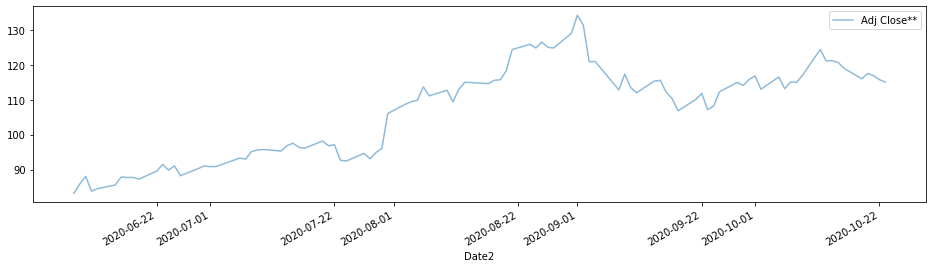

In [31]:
data_frame.plot(x = "Date2" ,  y='Adj Close**', figsize=(16,4), alpha=0.5)